<a href="https://colab.research.google.com/github/Ghislain-Gripon/data-analysis-python/blob/main/Work_Geopleth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install geopandas

     |████████████████████████████████| 972kB 5.8MB/s 
     |████████████████████████████████| 6.5MB 23.3MB/s 
     |████████████████████████████████| 14.8MB 301kB/s 


In [ ]:
import pandas as pd
import geopandas as gpd
map_df = gpd.read_file("/content/drive/My Drive/datasets/departements-20140306-5m-shp/departements-20140306-5m.shp")
map_df

,code_insee,nom,nuts3,wikipedia,geometry
0,01,Ain,FR711,b'fr:Ain (d\xe9partement)',"POLYGON ((5.25559 45.78459, 5.24813 45.78176, ..."
1,02,Aisne,FR221,b'fr:Aisne (d\xe9partement)',"POLYGON ((3.48175 48.86640, 3.48144 48.86635, ..."
2,03,Allier,FR721,b'fr:Allier (d\xe9partement)',"POLYGON ((2.38613 46.33196, 2.38597 46.33203, ..."
3,04,Alpes-de-Haute-Provence,FR821,fr:Alpes-de-Haute-Provence,"POLYGON ((6.66579 43.83120, 6.66739 43.83119, ..."
4,05,Hautes-Alpes,FR822,fr:Hautes-Alpes,"POLYGON ((6.24158 44.44686, 6.24210 44.44732, ..."
...,...,...,...,...,...
96,971,Guadeloupe,FR910,fr:Guadeloupe,"MULTIPOLYGON (((-61.61403 15.83955, -61.61399 ..."
97,972,Martinique,FR920,fr:Martinique,"MULTIPOLYGON (((-60.86880 14.39091, -60.86875 ..."
98,973,Guyane,FR930,fr:Guyane,"MULTIPOLYGON (((-52.58463 5.28309, -52.58348 5..."
99,974,b'La R\xe9union',FR940,b'fr:La R\xe9union',"MULTIPOLYGON (((55.77886 -21.36291, 55.77889 -..."


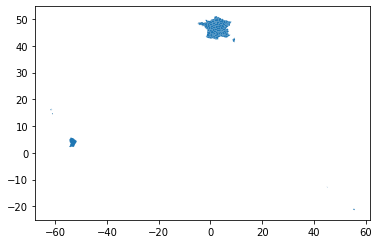

In [ ]:
import matplotlib as plt
%matplotlib inline
map_df.plot()

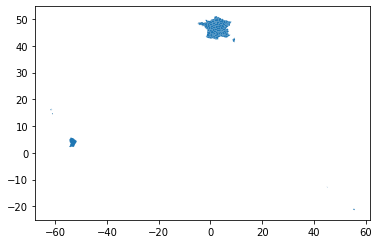

In [ ]:
map_df.plot()

In [ ]:
map_df[map_df.code_insee.str.contains("\d\d\d")]

,code_insee,nom,nuts3,wikipedia,geometry
96,971,Guadeloupe,FR910,fr:Guadeloupe,"MULTIPOLYGON (((-61.61403 15.83955, -61.61399 ..."
97,972,Martinique,FR920,fr:Martinique,"MULTIPOLYGON (((-60.86880 14.39091, -60.86875 ..."
98,973,Guyane,FR930,fr:Guyane,"MULTIPOLYGON (((-52.58463 5.28309, -52.58348 5..."
99,974,b'La R\xe9union',FR940,b'fr:La R\xe9union',"MULTIPOLYGON (((55.77886 -21.36291, 55.77889 -..."
100,976,Mayotte,None,fr:Mayotte,"MULTIPOLYGON (((45.13667 -13.00398, 45.13690 -..."


In [ ]:
map_df=map_df[map_df.code_insee.str.contains("\d\d\d")==False]

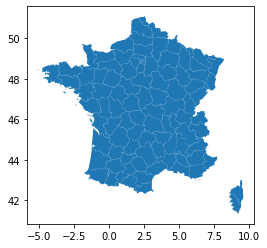

In [ ]:
map_df.plot()

In [ ]:
map_df

,code_insee,nom,nuts3,wikipedia,geometry
0,01,Ain,FR711,b'fr:Ain (d\xe9partement)',"POLYGON ((5.25559 45.78459, 5.24813 45.78176, ..."
1,02,Aisne,FR221,b'fr:Aisne (d\xe9partement)',"POLYGON ((3.48175 48.86640, 3.48144 48.86635, ..."
2,03,Allier,FR721,b'fr:Allier (d\xe9partement)',"POLYGON ((2.38613 46.33196, 2.38597 46.33203, ..."
3,04,Alpes-de-Haute-Provence,FR821,fr:Alpes-de-Haute-Provence,"POLYGON ((6.66579 43.83120, 6.66739 43.83119, ..."
4,05,Hautes-Alpes,FR822,fr:Hautes-Alpes,"POLYGON ((6.24158 44.44686, 6.24210 44.44732, ..."
...,...,...,...,...,...
91,91,Essonne,FR104,b'fr:Essonne (d\xe9partement)',"POLYGON ((2.39233 48.33593, 2.39382 48.33444, ..."
92,92,Hauts-de-Seine,FR105,fr:Hauts-de-Seine,"POLYGON ((2.31993 48.77075, 2.31786 48.76867, ..."
93,93,Seine-Saint-Denis,FR106,fr:Seine-Saint-Denis,"POLYGON ((2.41899 48.84939, 2.41636 48.84924, ..."
94,94,Val-de-Marne,FR107,fr:Val-de-Marne,"POLYGON ((2.41450 48.71780, 2.41320 48.71868, ..."


In [ ]:
prenoms= pd.read_csv("drive/My Drive/datasets/dpt2019_csv.zip",sep=";")
prenoms

,sexe,preusuel,annais,dpt,nombre
0,1,_PRENOMS_RARES,1900,02,7
1,1,_PRENOMS_RARES,1900,04,9
2,1,_PRENOMS_RARES,1900,05,8
3,1,_PRENOMS_RARES,1900,06,23
4,1,_PRENOMS_RARES,1900,07,9
...,...,...,...,...,...
3676677,2,ZYA,2018,59,3
3676678,2,ZYA,XXXX,XX,252
3676679,2,ZYNA,2013,93,3
3676680,2,ZYNA,XXXX,XX,54


In [ ]:
sexe_sum = prenoms.groupby(["dpt","sexe"]).sum()
sexe_sum = sexe_sum.reset_index()
sexe_sum

,dpt,sexe,nombre
0,01,1,223592
1,01,2,216540
2,02,1,430054
3,02,2,415771
4,03,1,254648
...,...,...,...
195,973,2,79971
196,974,1,617721
197,974,2,583845
198,XX,1,3779609


In [ ]:
import math
import numpy as np
boygirl = pd.DataFrame(sexe_sum["dpt"].unique())
boygirl["difference"] = pd.DataFrame(np.array(sexe_sum[sexe_sum.sexe == 1]["nombre"]) - np.array(sexe_sum[sexe_sum.sexe == 2]["nombre"]))
boygirl.reset_index()
boygirl.rename(columns = {0:'code_insee'}, inplace = True)
boygirl

,code_insee,difference
0,01,7052
1,02,14283
2,03,9138
3,04,4754
4,05,4331
...,...,...
95,971,35837
96,972,28965
97,973,14692
98,974,33876


In [ ]:
# NOW LET'S MAKE THE MERGE


mergedboygirl = map_df.merge(boygirl, on='code_insee')

mergedboygirl.head()

mergedboygirl

,code_insee,nom,nuts3,wikipedia,geometry,difference
0,01,Ain,FR711,b'fr:Ain (d\xe9partement)',"POLYGON ((5.25559 45.78459, 5.24813 45.78176, ...",7052
1,02,Aisne,FR221,b'fr:Aisne (d\xe9partement)',"POLYGON ((3.48175 48.86640, 3.48144 48.86635, ...",14283
2,03,Allier,FR721,b'fr:Allier (d\xe9partement)',"POLYGON ((2.38613 46.33196, 2.38597 46.33203, ...",9138
3,04,Alpes-de-Haute-Provence,FR821,fr:Alpes-de-Haute-Provence,"POLYGON ((6.66579 43.83120, 6.66739 43.83119, ...",4754
4,05,Hautes-Alpes,FR822,fr:Hautes-Alpes,"POLYGON ((6.24158 44.44686, 6.24210 44.44732, ...",4331
...,...,...,...,...,...,...
89,91,Essonne,FR104,b'fr:Essonne (d\xe9partement)',"POLYGON ((2.39233 48.33593, 2.39382 48.33444, ...",24063
90,92,Hauts-de-Seine,FR105,fr:Hauts-de-Seine,"POLYGON ((2.31993 48.77075, 2.31786 48.76867, ...",41381
91,93,Seine-Saint-Denis,FR106,fr:Seine-Saint-Denis,"POLYGON ((2.41899 48.84939, 2.41636 48.84924, ...",36399
92,94,Val-de-Marne,FR107,fr:Val-de-Marne,"POLYGON ((2.41450 48.71780, 2.41320 48.71868, ...",29286


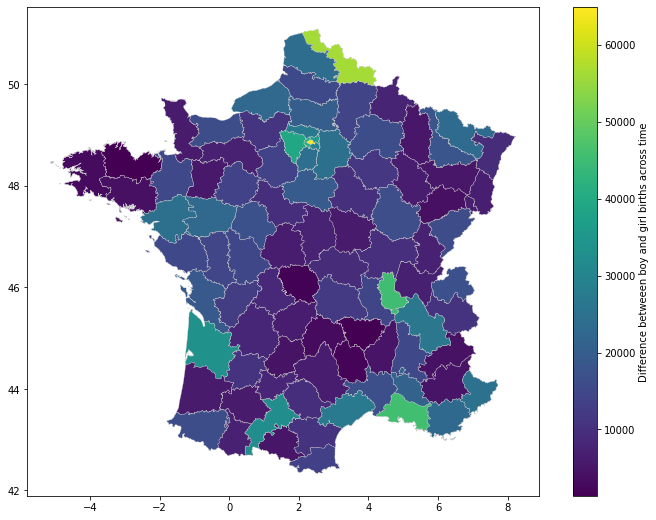

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, figsize=(12, 9))

mergedboygirl.plot(column="difference",   ax=ax, linewidth=0.3,edgecolor="0.8",legend=True,legend_kwds
            ={"label": "Difference betweeen boy and girl births across time"})

In [ ]:
pop = pd.read_excel("/content/drive/My Drive/datasets/pop2018excel.xlsx")
pop.reset_index()
pop

,code_insee,dpt,Total
0,01,Ain,647810
1,02,Aisne,532032
2,03,Allier,335884
3,04,Alpes-de-Haute-Provence,164439
4,05,Hautes-Alpes,141476
...,...,...,...
91,91,Essonne,1304015
92,92,Hauts-de-Seine,1611014
93,93,Seine-Saint-Denis,1639173
94,94,Val-de-Marne,1394344


In [ ]:
mergedboygirl = mergedboygirl.merge(pop, on='code_insee')

mergedboygirl.head()

mergedboygirl

,code_insee,nom,nuts3,wikipedia,geometry,difference,DEP,NBARR,NBCAN,NBCOM,PMUN,PTOT,weighted_difference,dpt,Total
0,01,Ain,FR711,b'fr:Ain (d\xe9partement)',"POLYGON ((5.25559 45.78459, 5.24813 45.78176, ...",7052,Ain,4,23.0,393,643350,659180,10.698140,Ain,647810
1,02,Aisne,FR221,b'fr:Aisne (d\xe9partement)',"POLYGON ((3.48175 48.86640, 3.48144 48.86635, ...",14283,Aisne,5,21.0,800,534490,546527,26.134116,Aisne,532032
2,03,Allier,FR721,b'fr:Allier (d\xe9partement)',"POLYGON ((2.38613 46.33196, 2.38597 46.33203, ...",9138,Allier,3,19.0,317,337988,347035,26.331638,Allier,335884
3,04,Alpes-de-Haute-Provence,FR821,fr:Alpes-de-Haute-Provence,"POLYGON ((6.66579 43.83120, 6.66739 43.83119, ...",4754,Alpes-de-Haute-Provence,4,15.0,198,163915,168381,28.233589,Alpes-de-Haute-Provence,164439
4,05,Hautes-Alpes,FR822,fr:Hautes-Alpes,"POLYGON ((6.24158 44.44686, 6.24210 44.44732, ...",4331,Hautes-Alpes,2,15.0,162,141284,145883,29.688175,Hautes-Alpes,141476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,91,Essonne,FR104,b'fr:Essonne (d\xe9partement)',"POLYGON ((2.39233 48.33593, 2.39382 48.33444, ...",24063,Essonne,3,21.0,194,1296130,1310599,18.360307,Essonne,1304015
90,92,Hauts-de-Seine,FR105,fr:Hauts-de-Seine,"POLYGON ((2.31993 48.77075, 2.31786 48.76867, ...",41381,Hauts-de-Seine,3,23.0,36,1609306,1625917,25.450869,Hauts-de-Seine,1611014
91,93,Seine-Saint-Denis,FR106,fr:Seine-Saint-Denis,"POLYGON ((2.41899 48.84939, 2.41636 48.84924, ...",36399,Seine-Saint-Denis,3,21.0,40,1623111,1630133,22.328853,Seine-Saint-Denis,1639173
92,94,Val-de-Marne,FR107,fr:Val-de-Marne,"POLYGON ((2.41450 48.71780, 2.41320 48.71868, ...",29286,Val-de-Marne,3,25.0,47,1387926,1397035,20.962968,Val-de-Marne,1394344


In [ ]:
mergedboygirl["weighted_difference"] = pd.DataFrame(1000*np.array(mergedboygirl["difference"]/np.array(mergedboygirl["Total"])))
mergedboygirl

,code_insee,nom,nuts3,wikipedia,geometry,difference,DEP,NBARR,NBCAN,NBCOM,PMUN,PTOT,weighted_difference,dpt,Total
0,01,Ain,FR711,b'fr:Ain (d\xe9partement)',"POLYGON ((5.25559 45.78459, 5.24813 45.78176, ...",7052,Ain,4,23.0,393,643350,659180,10.885908,Ain,647810
1,02,Aisne,FR221,b'fr:Aisne (d\xe9partement)',"POLYGON ((3.48175 48.86640, 3.48144 48.86635, ...",14283,Aisne,5,21.0,800,534490,546527,26.846130,Aisne,532032
2,03,Allier,FR721,b'fr:Allier (d\xe9partement)',"POLYGON ((2.38613 46.33196, 2.38597 46.33203, ...",9138,Allier,3,19.0,317,337988,347035,27.205821,Allier,335884
3,04,Alpes-de-Haute-Provence,FR821,fr:Alpes-de-Haute-Provence,"POLYGON ((6.66579 43.83120, 6.66739 43.83119, ...",4754,Alpes-de-Haute-Provence,4,15.0,198,163915,168381,28.910417,Alpes-de-Haute-Provence,164439
4,05,Hautes-Alpes,FR822,fr:Hautes-Alpes,"POLYGON ((6.24158 44.44686, 6.24210 44.44732, ...",4331,Hautes-Alpes,2,15.0,162,141284,145883,30.612966,Hautes-Alpes,141476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,91,Essonne,FR104,b'fr:Essonne (d\xe9partement)',"POLYGON ((2.39233 48.33593, 2.39382 48.33444, ...",24063,Essonne,3,21.0,194,1296130,1310599,18.453009,Essonne,1304015
90,92,Hauts-de-Seine,FR105,fr:Hauts-de-Seine,"POLYGON ((2.31993 48.77075, 2.31786 48.76867, ...",41381,Hauts-de-Seine,3,23.0,36,1609306,1625917,25.686307,Hauts-de-Seine,1611014
91,93,Seine-Saint-Denis,FR106,fr:Seine-Saint-Denis,"POLYGON ((2.41899 48.84939, 2.41636 48.84924, ...",36399,Seine-Saint-Denis,3,21.0,40,1623111,1630133,22.205710,Seine-Saint-Denis,1639173
92,94,Val-de-Marne,FR107,fr:Val-de-Marne,"POLYGON ((2.41450 48.71780, 2.41320 48.71868, ...",29286,Val-de-Marne,3,25.0,47,1387926,1397035,21.003425,Val-de-Marne,1394344


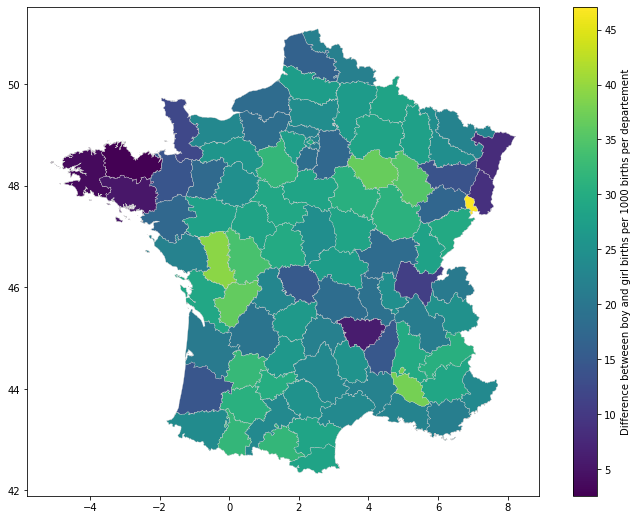

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, figsize=(12, 9))

mergedboygirl.plot(column="weighted_difference",   ax=ax, linewidth=0.3,edgecolor="0.8",legend=True,legend_kwds
            ={"label": "Difference betweeen boy and girl births per 1000 births per departement"})

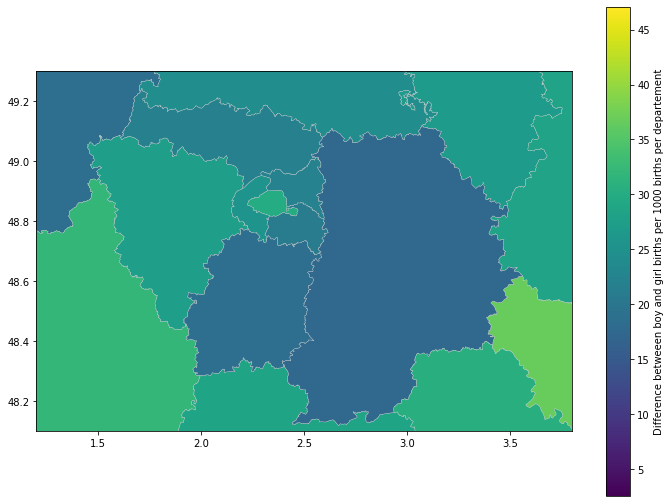

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, figsize=(12, 9))
plt.axis([1.2,3.8,48.1,49.3])

mergedboygirl.plot(column="weighted_difference",   ax=ax, linewidth=0.3,edgecolor="0.8",legend=True,legend_kwds
            ={"label": "Difference betweeen boy and girl births per 1000 births per departement"})

In [ ]:
# DATASETS FOR EXERCISE
# https://www.insee.fr/fr/statistiques/1893198

In [ ]:
prenoms

,sexe,preusuel,annais,dpt,nombre
0,1,_PRENOMS_RARES,1900,02,7
1,1,_PRENOMS_RARES,1900,04,9
2,1,_PRENOMS_RARES,1900,05,8
3,1,_PRENOMS_RARES,1900,06,23
4,1,_PRENOMS_RARES,1900,07,9
...,...,...,...,...,...
3676677,2,ZYA,2018,59,3
3676678,2,ZYA,XXXX,XX,252
3676679,2,ZYNA,2013,93,3
3676680,2,ZYNA,XXXX,XX,54


In [ ]:
emma2018 = prenoms[prenoms.annais == "2018"][prenoms.preusuel == "EMMA"].groupby("dpt").sum()
emma2018 = emma2018.reset_index()
emma2018.rename(columns= {"dpt":"code_insee"}, inplace = True)
emma2018

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,code_insee,sexe,nombre
0,01,2,37
1,02,2,38
2,03,2,28
3,04,2,6
4,05,2,10
...,...,...,...
93,95,2,79
94,971,2,17
95,972,2,11
96,973,2,11


In [ ]:
mergedemma2018 = map_df.merge(emma2018, on='code_insee')

mergedemma2018.head()

mergedemma2018

,code_insee,nom,nuts3,wikipedia,geometry,sexe,nombre
0,01,Ain,FR711,b'fr:Ain (d\xe9partement)',"POLYGON ((5.25559 45.78459, 5.24813 45.78176, ...",2,37
1,02,Aisne,FR221,b'fr:Aisne (d\xe9partement)',"POLYGON ((3.48175 48.86640, 3.48144 48.86635, ...",2,38
2,03,Allier,FR721,b'fr:Allier (d\xe9partement)',"POLYGON ((2.38613 46.33196, 2.38597 46.33203, ...",2,28
3,04,Alpes-de-Haute-Provence,FR821,fr:Alpes-de-Haute-Provence,"POLYGON ((6.66579 43.83120, 6.66739 43.83119, ...",2,6
4,05,Hautes-Alpes,FR822,fr:Hautes-Alpes,"POLYGON ((6.24158 44.44686, 6.24210 44.44732, ...",2,10
...,...,...,...,...,...,...,...
88,91,Essonne,FR104,b'fr:Essonne (d\xe9partement)',"POLYGON ((2.39233 48.33593, 2.39382 48.33444, ...",2,75
89,92,Hauts-de-Seine,FR105,fr:Hauts-de-Seine,"POLYGON ((2.31993 48.77075, 2.31786 48.76867, ...",2,142
90,93,Seine-Saint-Denis,FR106,fr:Seine-Saint-Denis,"POLYGON ((2.41899 48.84939, 2.41636 48.84924, ...",2,48
91,94,Val-de-Marne,FR107,fr:Val-de-Marne,"POLYGON ((2.41450 48.71780, 2.41320 48.71868, ...",2,102


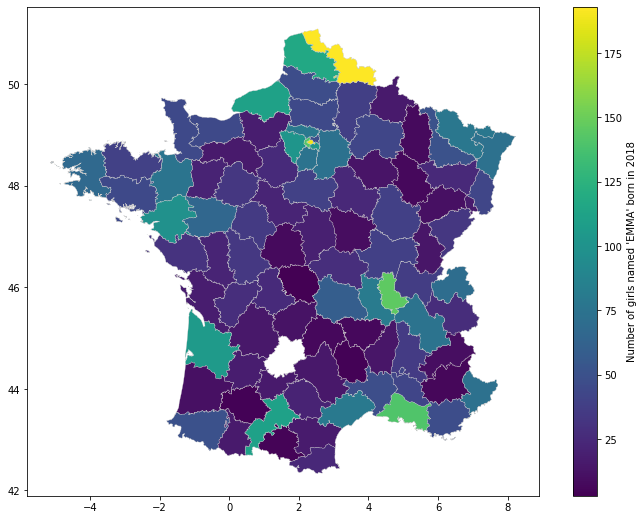

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, figsize=(12, 9))

mergedemma2018.plot(column="nombre",   ax=ax, linewidth=0.3,edgecolor="0.8",legend=True,legend_kwds
            ={"label": "Number of girls named 'EMMA' born in 2018"})

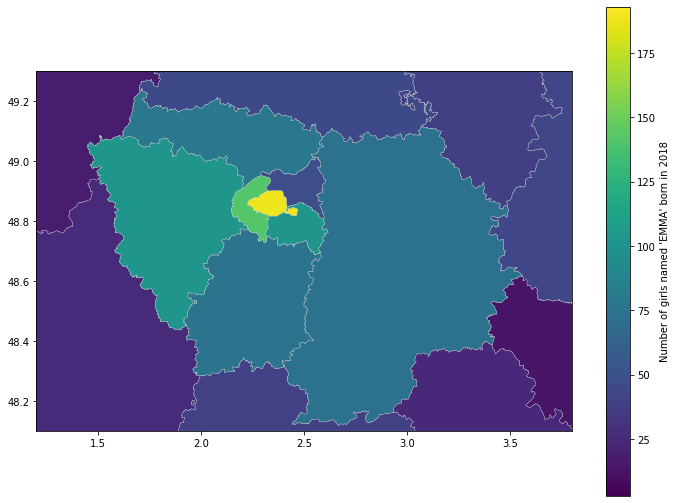

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, figsize=(12, 9))
plt.axis([1.2,3.8,48.1,49.3])

mergedemma2018.plot(column="nombre",   ax=ax, linewidth=0.3,edgecolor="0.8",legend=True,legend_kwds
            ={"label": "Number of girls named 'EMMA' born in 2018"})

In [ ]:
mergedemma2018weight = mergedemma2018.merge(pop, on='code_insee')

mergedemma2018weight.head()

mergedemma2018weight

,code_insee,nom,nuts3,wikipedia,geometry,sexe,nombre,dpt,Total
0,01,Ain,FR711,b'fr:Ain (d\xe9partement)',"POLYGON ((5.25559 45.78459, 5.24813 45.78176, ...",2,37,Ain,647810
1,02,Aisne,FR221,b'fr:Aisne (d\xe9partement)',"POLYGON ((3.48175 48.86640, 3.48144 48.86635, ...",2,38,Aisne,532032
2,03,Allier,FR721,b'fr:Allier (d\xe9partement)',"POLYGON ((2.38613 46.33196, 2.38597 46.33203, ...",2,28,Allier,335884
3,04,Alpes-de-Haute-Provence,FR821,fr:Alpes-de-Haute-Provence,"POLYGON ((6.66579 43.83120, 6.66739 43.83119, ...",2,6,Alpes-de-Haute-Provence,164439
4,05,Hautes-Alpes,FR822,fr:Hautes-Alpes,"POLYGON ((6.24158 44.44686, 6.24210 44.44732, ...",2,10,Hautes-Alpes,141476
...,...,...,...,...,...,...,...,...,...
88,91,Essonne,FR104,b'fr:Essonne (d\xe9partement)',"POLYGON ((2.39233 48.33593, 2.39382 48.33444, ...",2,75,Essonne,1304015
89,92,Hauts-de-Seine,FR105,fr:Hauts-de-Seine,"POLYGON ((2.31993 48.77075, 2.31786 48.76867, ...",2,142,Hauts-de-Seine,1611014
90,93,Seine-Saint-Denis,FR106,fr:Seine-Saint-Denis,"POLYGON ((2.41899 48.84939, 2.41636 48.84924, ...",2,48,Seine-Saint-Denis,1639173
91,94,Val-de-Marne,FR107,fr:Val-de-Marne,"POLYGON ((2.41450 48.71780, 2.41320 48.71868, ...",2,102,Val-de-Marne,1394344


In [ ]:
mergedemma2018weight["emmaper1000"] = pd.DataFrame(1000*np.array(mergedemma2018weight["nombre"])/np.array(mergedemma2018weight["Total"]))
mergedemma2018weight

,code_insee,nom,nuts3,wikipedia,geometry,sexe,nombre,dpt,Total,emmaper1000
0,01,Ain,FR711,b'fr:Ain (d\xe9partement)',"POLYGON ((5.25559 45.78459, 5.24813 45.78176, ...",2,37,Ain,647810,0.057116
1,02,Aisne,FR221,b'fr:Aisne (d\xe9partement)',"POLYGON ((3.48175 48.86640, 3.48144 48.86635, ...",2,38,Aisne,532032,0.071424
2,03,Allier,FR721,b'fr:Allier (d\xe9partement)',"POLYGON ((2.38613 46.33196, 2.38597 46.33203, ...",2,28,Allier,335884,0.083362
3,04,Alpes-de-Haute-Provence,FR821,fr:Alpes-de-Haute-Provence,"POLYGON ((6.66579 43.83120, 6.66739 43.83119, ...",2,6,Alpes-de-Haute-Provence,164439,0.036488
4,05,Hautes-Alpes,FR822,fr:Hautes-Alpes,"POLYGON ((6.24158 44.44686, 6.24210 44.44732, ...",2,10,Hautes-Alpes,141476,0.070683
...,...,...,...,...,...,...,...,...,...,...
88,91,Essonne,FR104,b'fr:Essonne (d\xe9partement)',"POLYGON ((2.39233 48.33593, 2.39382 48.33444, ...",2,75,Essonne,1304015,0.057515
89,92,Hauts-de-Seine,FR105,fr:Hauts-de-Seine,"POLYGON ((2.31993 48.77075, 2.31786 48.76867, ...",2,142,Hauts-de-Seine,1611014,0.088143
90,93,Seine-Saint-Denis,FR106,fr:Seine-Saint-Denis,"POLYGON ((2.41899 48.84939, 2.41636 48.84924, ...",2,48,Seine-Saint-Denis,1639173,0.029283
91,94,Val-de-Marne,FR107,fr:Val-de-Marne,"POLYGON ((2.41450 48.71780, 2.41320 48.71868, ...",2,102,Val-de-Marne,1394344,0.073153


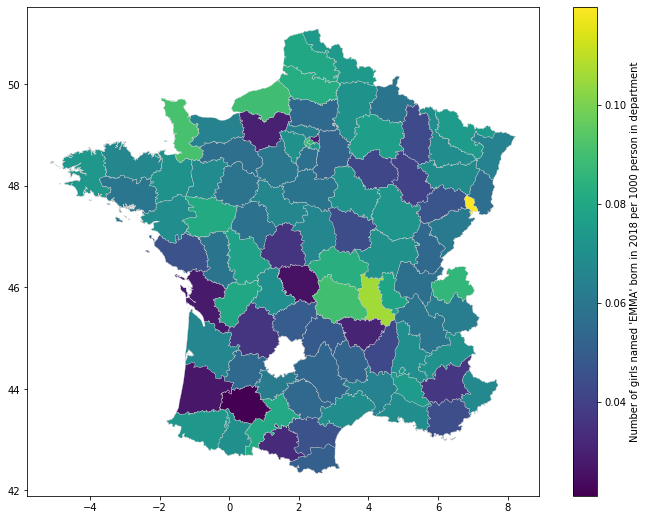

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, figsize=(12, 9))

mergedemma2018weight.plot(column="emmaper1000",   ax=ax, linewidth=0.3,edgecolor="0.8",legend=True,legend_kwds
            ={"label": "Number of girls named 'EMMA' born in 2018 per 1000 person in department"})

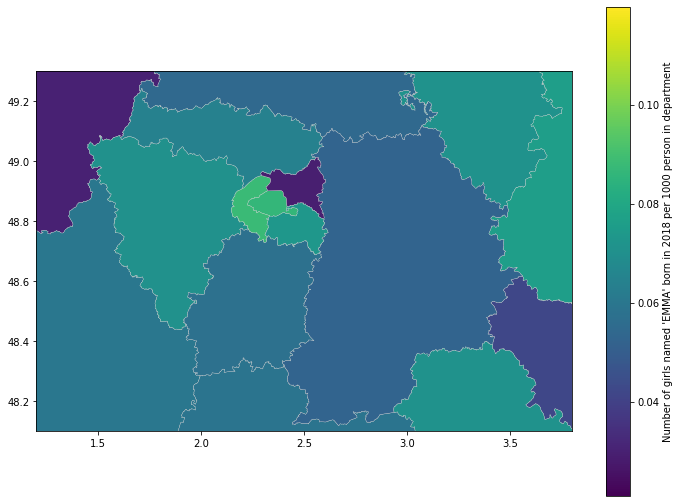

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, figsize=(12, 9))
plt.axis([1.2,3.8,48.1,49.3])

mergedemma2018weight.plot(column="emmaper1000",   ax=ax, linewidth=0.3,edgecolor="0.8",legend=True,legend_kwds
            ={"label": "Number of girls named 'EMMA' born in 2018 per 1000 person in department"})